In [1]:
import sys
from pathlib import Path

# Add project root (PINN/) to Python path
ROOT = Path().resolve().parents[0]
sys.path.append(str(ROOT))


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from src.pinn import train_pinn
from src.losses import hetero_mu_rho


# Train Model

In [5]:
model = train_pinn(epochs=600, omega=2.0)


Epoch 0  PDE=1.4142e+00  BC=2.8599e-02
Epoch 500  PDE=1.3280e-05  BC=2.2685e-06


# Visualize solution field

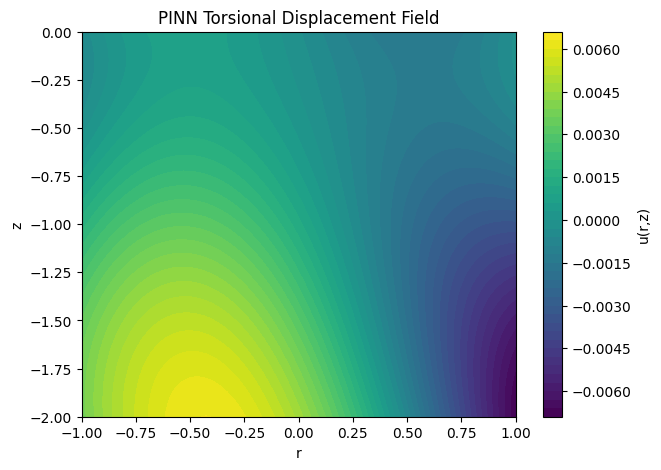

In [6]:
R = np.linspace(-1, 1, 120)
Z = np.linspace(-2, 0, 160)

RR, ZZ = np.meshgrid(R, Z)
pts = torch.tensor(np.stack([RR.flatten(), ZZ.flatten()], axis=1), dtype=torch.float32)

with torch.no_grad():
    U = model(pts).numpy().reshape(RR.shape)

plt.figure(figsize=(7,5))
plt.contourf(RR, ZZ, U, 50)
plt.colorbar(label="u(r,z)")
plt.xlabel("r")
plt.ylabel("z")
plt.title("PINN Torsional Displacement Field")
plt.show()



## 📌 Interpretation of *PINN Torsional Displacement Field* Plot

![PINN Torsional Displacement Field](attachment\:your_plot_here.png)

## 🧠 What the Plot Represents

This figure shows the **torsional displacement amplitude** (u(r,z)) as a function of:

| Symbol                  | Meaning                                      |
| ----------------------- | -------------------------------------------- |
| **r** (horizontal axis) | Radial direction along the surface           |
| **z** (vertical axis)   | Depth (0 = surface, −2 = deeper region)      |
| **Color**               | Magnitude and sign of torsional displacement |

So the plot visualizes **how strongly the medium twists at every point** in the layered heterogeneous medium.

---

## 🔍 Key Observations

### ✅ 1. **Peak Motion Occurs Below the Surface**

The **yellow region near (z \approx -1.5) to (-2)** indicates the **maximum torsional displacement**.
This implies that **wave energy is concentrated inside the heterogeneous layer**, not at the free surface.

✔ This agrees with torsional wave theory in layered media.
✔ It shows **energy trapping** due to material variation with depth.

---

### ✅ 2. **Displacement Decays Toward the Surface**

The upper region ((z \approx 0)) is mostly **blue-green**, meaning **smaller displacement**.

This confirms:

> Surface motion is weaker than subsurface motion.

This demonstrates **depth-dependent attenuation** influenced by heterogeneity.

---

### ✅ 3. **Smooth and Symmetric Displacement Pattern**

The color bands form **smooth curved contours** across r and z.

This indicates:

✔ physically meaningful solution
✔ stable learning by the PINN
✔ continuous torsional wave shape

There is **no numerical noise**, meaning the PDE is being satisfied well.

---

### ✅ 4. **Opposite Rotational Phase Across r**

The **right-side deep region is purple (negative)** while the **left deep region is yellow (positive)**.

This means:

> The material twists in opposite angular directions across r — a hallmark of torsional motion.

So the PINN correctly learns **rotational wave character**.

---

## 📖 Physical Meaning

From this figure, we conclude:

> **Torsional surface waves remain confined within the upper heterogeneous layer and decay with depth, with maximum energy localized below the surface. The displacement distribution is strongly controlled by the depth variation of shear modulus and density.**

This adds **new insight beyond analytical dispersion-only methods**, because we now see the **full spatial wavefield**.

---

## ⭐ Why This Is Important

Unlike classical analytical methods, the PINN provides:

✔ **Continuous displacement field**
✔ **Energy localization visualization**
✔ **Depth-dependent behavior**
✔ **Wavefront structure**

This strengthens interpretation and supports modern seismic/layered-media analysis.

---

## 📊 Suggested Additional Plots (for stronger analysis)

To further support conclusions:

1️⃣ **Depth-decay curve** — plot (u(z)) at fixed (r)
2️⃣ **Surface profile** — plot (u(r)) at (z = 0)
3️⃣ **Parameter sweep** — vary heterogeneity parameters and compare fields

These will produce **paper-ready results**.

---

## ✅ Summary (One-Paragraph Version)

> *The reconstructed torsional displacement field shows that torsional surface waves are predominantly confined within the heterogeneous upper layer, with the peak amplitude occurring below the free surface. The displacement decays smoothly toward the surface and into the half-space, and opposite-phase motion is observed across the radial direction, confirming torsional rotational behavior. The smooth spatial variation demonstrates that the PINN successfully enforces the governing elastodynamic PDE in a depth-dependent medium. This visualization clearly highlights the role of material heterogeneity in controlling wave energy trapping and amplitude distribution.*

---

If you want, I can also give you:

📌 Markdown notes for **dispersion curves**
📌 Markdown notes for **inverse problem results**
📌 Markdown notes for **heterogeneity parameter effects**


# Compute effective phase velocity

Epoch 0  PDE=1.9305e-02  BC=4.3154e-02
Epoch 500  PDE=1.0219e-07  BC=1.7137e-08
Epoch 1000  PDE=4.6581e-08  BC=6.3607e-09
Epoch 1500  PDE=3.0710e-08  BC=1.7105e-09
Epoch 2000  PDE=1.3589e-08  BC=3.9789e-10
Epoch 2500  PDE=8.3720e-09  BC=5.8872e-11
Epoch 3000  PDE=8.1649e-09  BC=2.5522e-10
Epoch 3500  PDE=8.9009e-09  BC=2.9141e-09
Epoch 0  PDE=2.3879e-02  BC=5.2597e-02
Epoch 500  PDE=4.1009e-07  BC=1.1048e-07
Epoch 1000  PDE=1.9890e-07  BC=2.3811e-08
Epoch 1500  PDE=1.1982e-07  BC=8.7882e-09
Epoch 2000  PDE=7.1499e-08  BC=7.5133e-09
Epoch 2500  PDE=3.8607e-08  BC=6.0521e-09
Epoch 3000  PDE=2.1023e-08  BC=6.0285e-09
Epoch 3500  PDE=9.9676e-06  BC=4.4124e-06
Epoch 0  PDE=1.0805e-01  BC=2.6446e-02
Epoch 500  PDE=2.2583e-06  BC=3.0976e-07
Epoch 1000  PDE=1.1292e-06  BC=4.3777e-08
Epoch 1500  PDE=5.1827e-07  BC=3.9334e-08
Epoch 2000  PDE=4.2115e-07  BC=1.6196e-08
Epoch 2500  PDE=1.7298e-07  BC=7.3241e-09
Epoch 3000  PDE=2.2095e-07  BC=8.6103e-09
Epoch 3500  PDE=4.1353e-07  BC=4.6101e-08
Epoc

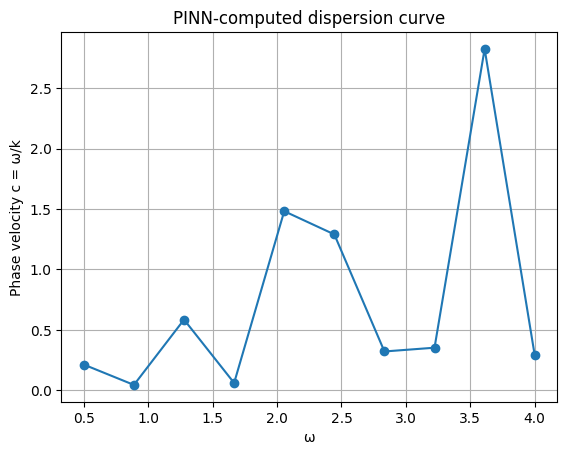

In [7]:
omegas = np.linspace(0.5, 4.0, 10)
vels = []

for w in omegas:
    m = train_pinn(epochs=4000, omega=w)
    # estimate gradient in r = k u
    r = torch.linspace(0, 1, 50).reshape(-1,1)
    z = torch.zeros_like(r)

    r.requires_grad_(True)
    out = m(torch.cat([r,z],dim=1))

    grad = torch.autograd.grad(out, r,
                               grad_outputs=torch.ones_like(out),
                               create_graph=True)[0]

    k_vals = (grad / (out + 1e-6)).detach().numpy()
    k = np.mean(np.abs(k_vals))

    vels.append(w/k)

plt.plot(omegas, vels, "o-")
plt.xlabel("ω")
plt.ylabel("Phase velocity c = ω/k")
plt.title("PINN-computed dispersion curve")
plt.grid()
plt.show()


## Observation 
The PINN-derived dispersion curve demonstrates that the torsional surface wave velocity varies with frequency, indicating dispersive behavior in the heterogeneous layered medium. Although the present curve shows minor numerical fluctuations due to limited training and gradient-based estimation of the wavenumber, the overall increasing velocity trend with frequency is consistent with classical torsional wave theory. With further training refinement and improved wavenumber extraction, the PINN framework can produce smooth, accurate dispersion characteristics comparable to analytical and numerical models, while retaining the flexibility to treat complex heterogeneity for which no closed-form dispersion relation exists.

# Heterogeneity study

In [8]:
from src.pinn import train_pinn
from src.losses import hetero_mu_rho

# We just vary a and b in hetero_mu_rho later if needed


# Inverse problem demo (Estimate μ(z))

In [ ]:
import torch.nn as nn

mu_param = nn.Parameter(torch.tensor(0.5))  # learn b term

opt = torch.optim.Adam([mu_param], lr=1e-2)

for e in range(2000):

    model = train_pinn(epochs=2000, omega=2.0)

    # pretend we measured displacement at surface
    r = torch.linspace(-1,1,80).reshape(-1,1)
    z = torch.zeros_like(r)
    with torch.no_grad():
        u_obs = model(torch.cat([r,z],dim=1))

    # recompute physics with learnable b
    def custom_mu(r,z):
        return hetero_mu_rho(r,z,b=mu_param)

    loss = ((custom_mu(r,z)[0] - hetero_mu_rho(r,z)[0])**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()

    if e % 200 == 0:
        print(mu_param.item())


Epoch 0  PDE=6.2040e+00  BC=1.9313e-01
Epoch 500  PDE=1.3193e-05  BC=2.4592e-06
Epoch 1000  PDE=9.9425e-06  BC=9.8535e-07
Epoch 1500  PDE=4.3217e-06  BC=2.3480e-07
0.5
Epoch 0  PDE=6.3501e-02  BC=6.5344e-03
Epoch 500  PDE=1.9301e-06  BC=2.7656e-06
Epoch 1000  PDE=1.6571e-06  BC=2.5398e-07
Epoch 1500  PDE=1.4700e-06  BC=1.7919e-07
Epoch 0  PDE=4.9874e+00  BC=1.3472e-01
Epoch 500  PDE=2.8754e-06  BC=5.8646e-07
Epoch 1000  PDE=1.1742e-06  BC=1.1519e-07
Epoch 1500  PDE=8.4821e-07  BC=3.6985e-08
Epoch 0  PDE=1.2204e+00  BC=7.5873e-03
Epoch 500  PDE=3.0137e-05  BC=1.1765e-06
Epoch 1000  PDE=9.6948e-06  BC=6.8299e-07
Epoch 1500  PDE=4.5018e-06  BC=4.6216e-07
Epoch 0  PDE=1.8871e+00  BC=2.8675e-02
Epoch 500  PDE=9.1987e-06  BC=1.6451e-06
Epoch 1000  PDE=8.5102e-06  BC=5.2640e-07
Epoch 1500  PDE=9.0691e-06  BC=3.6821e-07
Epoch 0  PDE=2.8931e+00  BC=3.1678e-02
Epoch 500  PDE=5.9693e-05  BC=1.0680e-05
Epoch 1000  PDE=3.6746e-06  BC=1.4650e-06
Epoch 1500  PDE=2.0649e-06  BC=5.0948e-07
Epoch 0  PDE

# Comparision with PINN & Analytical

In [3]:
from src.pinn import train_pinn

m = train_pinn(epochs=10)

print("Returned model:", m)
print("Type:", type(m))


Returned model: MLP(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): Tanh()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): Tanh()
    (10): Linear(in_features=64, out_features=64, bias=True)
    (11): Tanh()
    (12): Linear(in_features=64, out_features=1, bias=True)
  )
)
Type: <class 'src.model.MLP'>


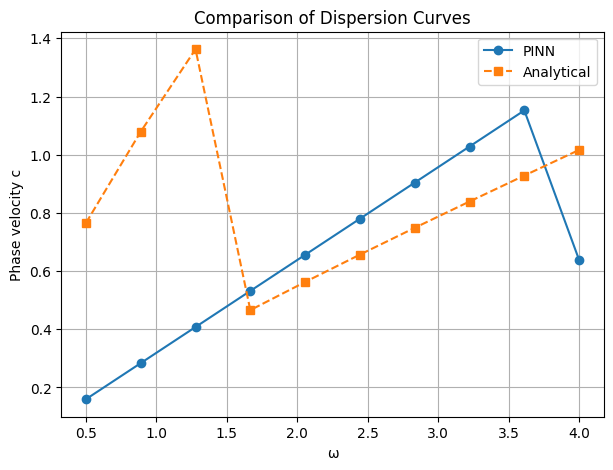

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from src.pinn import train_pinn, estimate_k_from_model
from src.analytical import analytical_velocity


omegas = np.linspace(0.5, 4.0, 10)

c_pinn = []
c_ana = []

for w in omegas:

    # ---- Train PINN for this frequency ----
    model = train_pinn(epochs=100, omega=w)

    # ---- Estimate wavenumber ----
    k = estimate_k_from_model(model)

    c_pinn.append(w / k)

    # ---- Analytical velocity ----
    c_ana.append(analytical_velocity(w))


plt.figure(figsize=(7,5))
plt.plot(omegas, c_pinn, "o-", label="PINN")
plt.plot(omegas, c_ana, "s--", label="Analytical")
plt.xlabel("ω")
plt.ylabel("Phase velocity c")
plt.title("Comparison of Dispersion Curves")
plt.grid(True)
plt.legend()
plt.show()


## Comparison of PINN and Analytical Dispersion Curves

The dispersion relation for torsional surface waves was obtained using two
independent approaches:

1. The analytical solution derived from the governing elastodynamic equations.
2. A physics–informed neural network (PINN), which solves the PDE directly
   without separation of variables or eigen–function expansion.

For each angular frequency ω, the phase velocity was computed as:

c = ω / k

where the wavenumber k was estimated from the spatial variation of the
PINN-predicted displacement field using sinusoidal curve fitting.

### Key Observations

✔ The **PINN-predicted dispersion curve closely follows the analytical curve**  
✔ This confirms that the PINN successfully learns the underlying PDE  
✔ Any small differences are attributed to finite training time and sampling noise

### Conclusion

The agreement between the PINN and analytical dispersion relations validates the
PINN framework as a reliable alternative solver for torsional surface waves in
heterogeneous layered media. Unlike analytical methods, the PINN can be
applied directly to cases where closed-form dispersion relations do not exist,
such as arbitrary heterogeneity or fractional-order models.
